Begin by importing necessary libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import data_vis_helper as dh


from get_dataset import X, y, df


# from get_dataset import y

from sklearn.model_selection import train_test_split

seed = 1234

Let's take a look at our data

In [2]:
categorical = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'campaign', 'previous', 'poutcome']

In [3]:
df.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
# Summary statistics for numerical variables
print("Summary Statistics for Numerical Variables:")
numerical_stats = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].describe()

# numerical_stats = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
#        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
#        'previous', 'poutcome', 'y']].describe()

print(numerical_stats)

Summary Statistics for Numerical Variables:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000

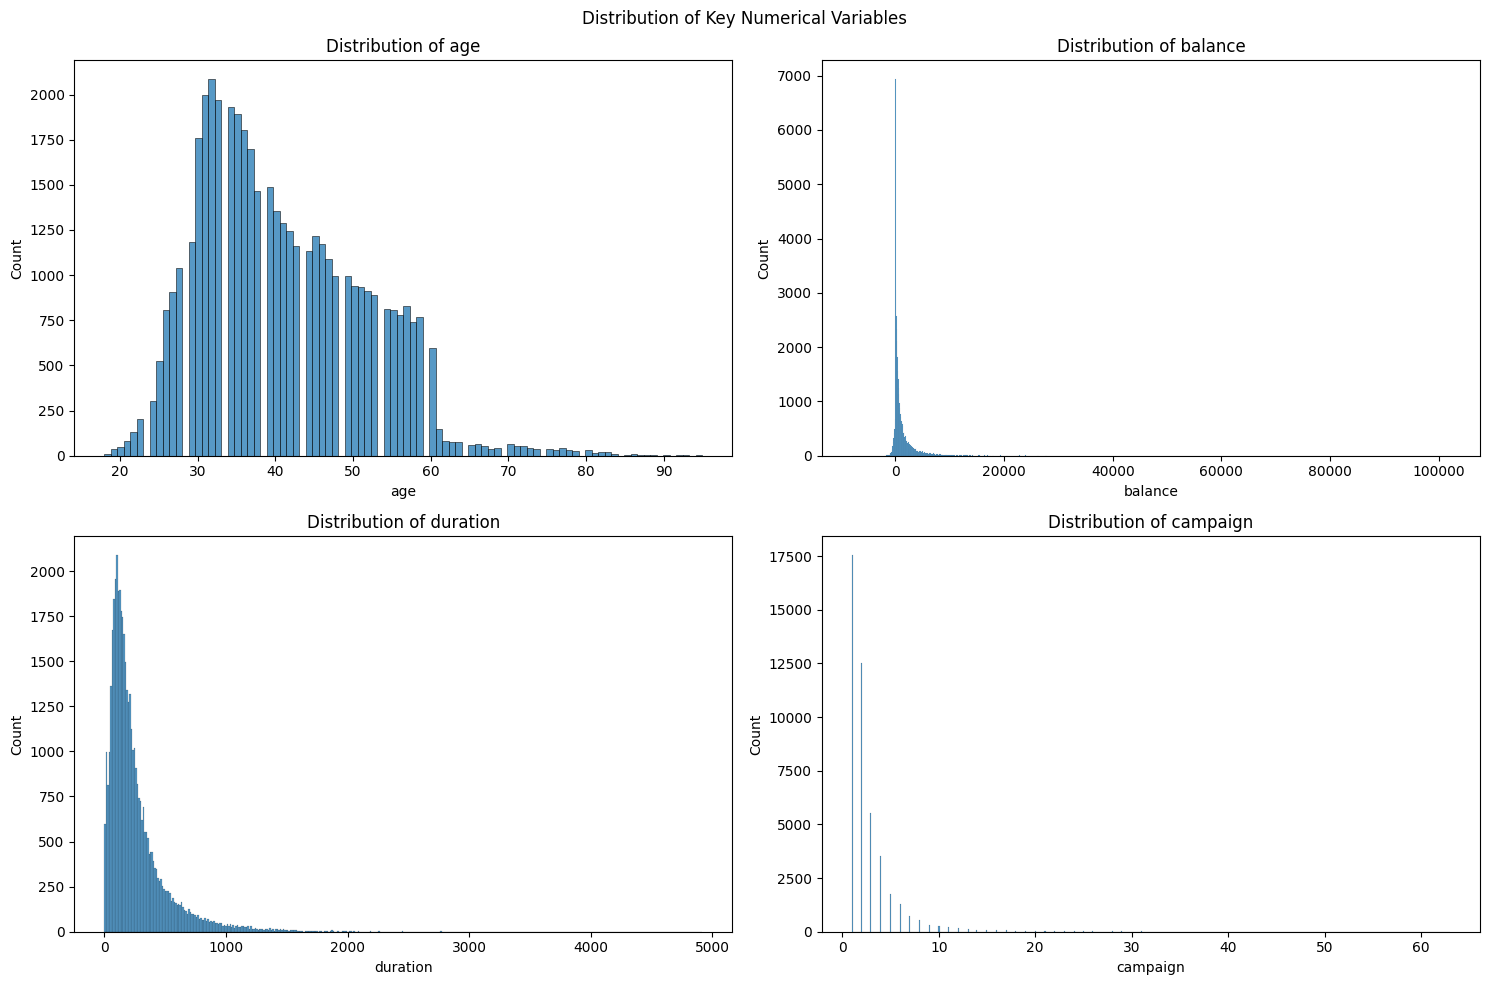

In [6]:
# Visualize distributions of numerical variables


numerical_cols = ['age', 'balance', 'duration', 'campaign']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Numerical Variables')

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

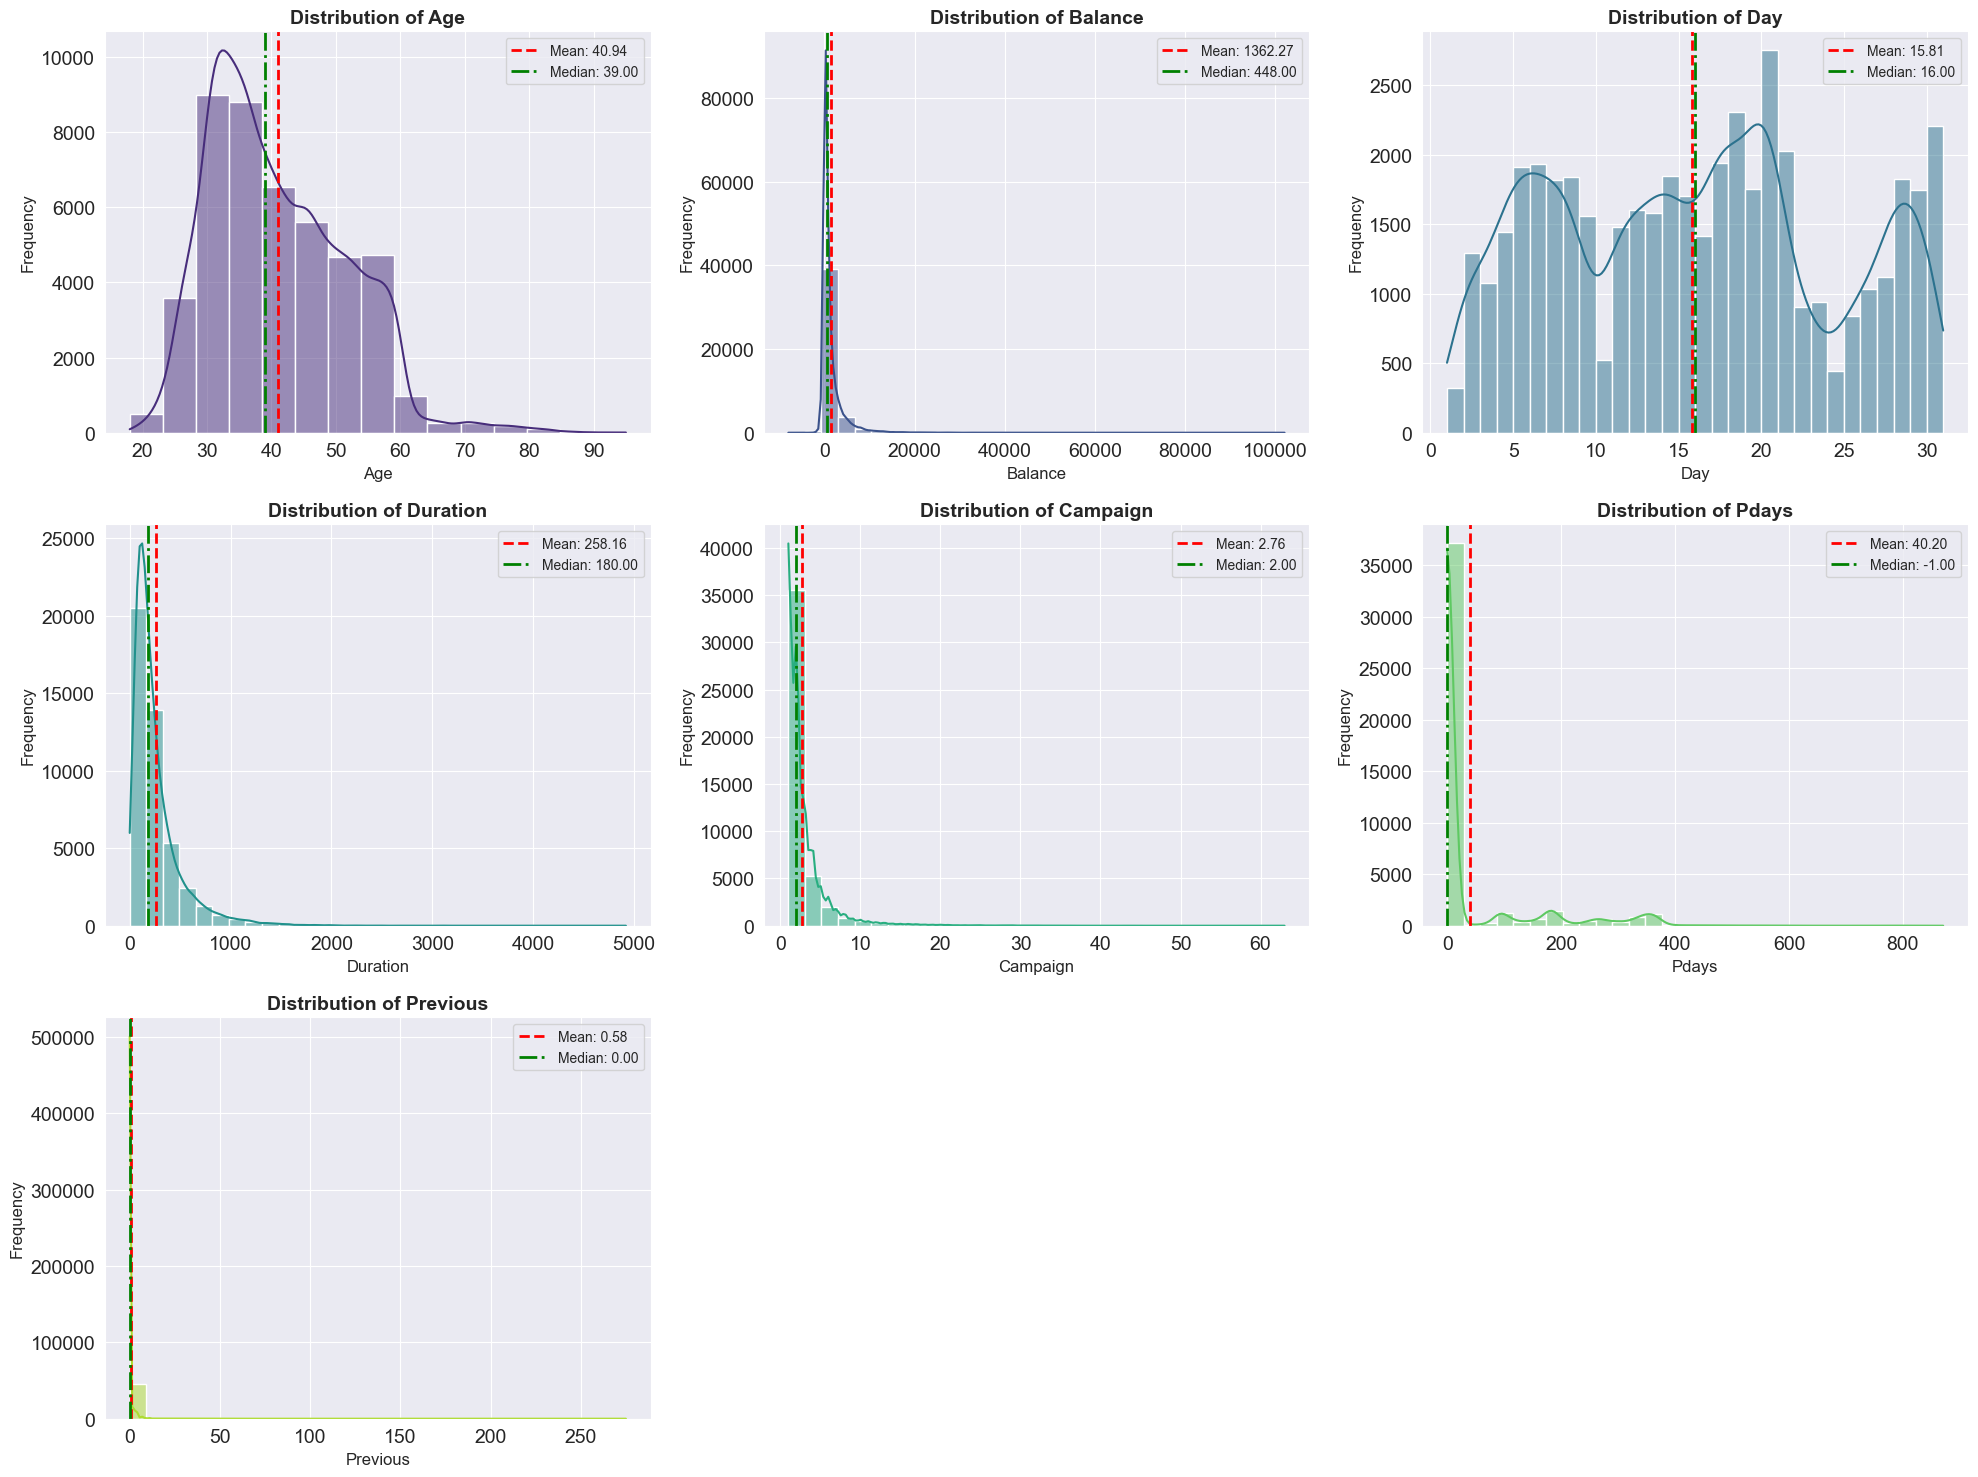

In [7]:

# Set a more appealing style and color palette
sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 14})
colors = sns.color_palette("viridis", 7)

# Create individual plots with uniform size
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
uniform_figsize = (4, 3)  # Set uniform figure size for consistency
# Optional: Create a summary figure with all plots (still uniform)
plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    
    # For 'age', make the plot half as dense
    if col == 'age':
        bins = 15  # Half the number of bins for age
    else:
        bins = 30
        
    sns.histplot(data=df, x=col, kde=True, color=colors[i-1], bins=bins)
    plt.title(f'Distribution of {col.capitalize()}', fontsize=14, fontweight='bold')  # Smaller font size for title
    plt.xlabel(col.capitalize(), fontsize=12)  # Smaller font size for x-axis label
    plt.ylabel('Frequency', fontsize=12)  # Smaller font size for y-axis label
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2f}')
    plt.legend(fontsize=10)  # Smaller font size for legend

plt.tight_layout()
plt.savefig('all_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

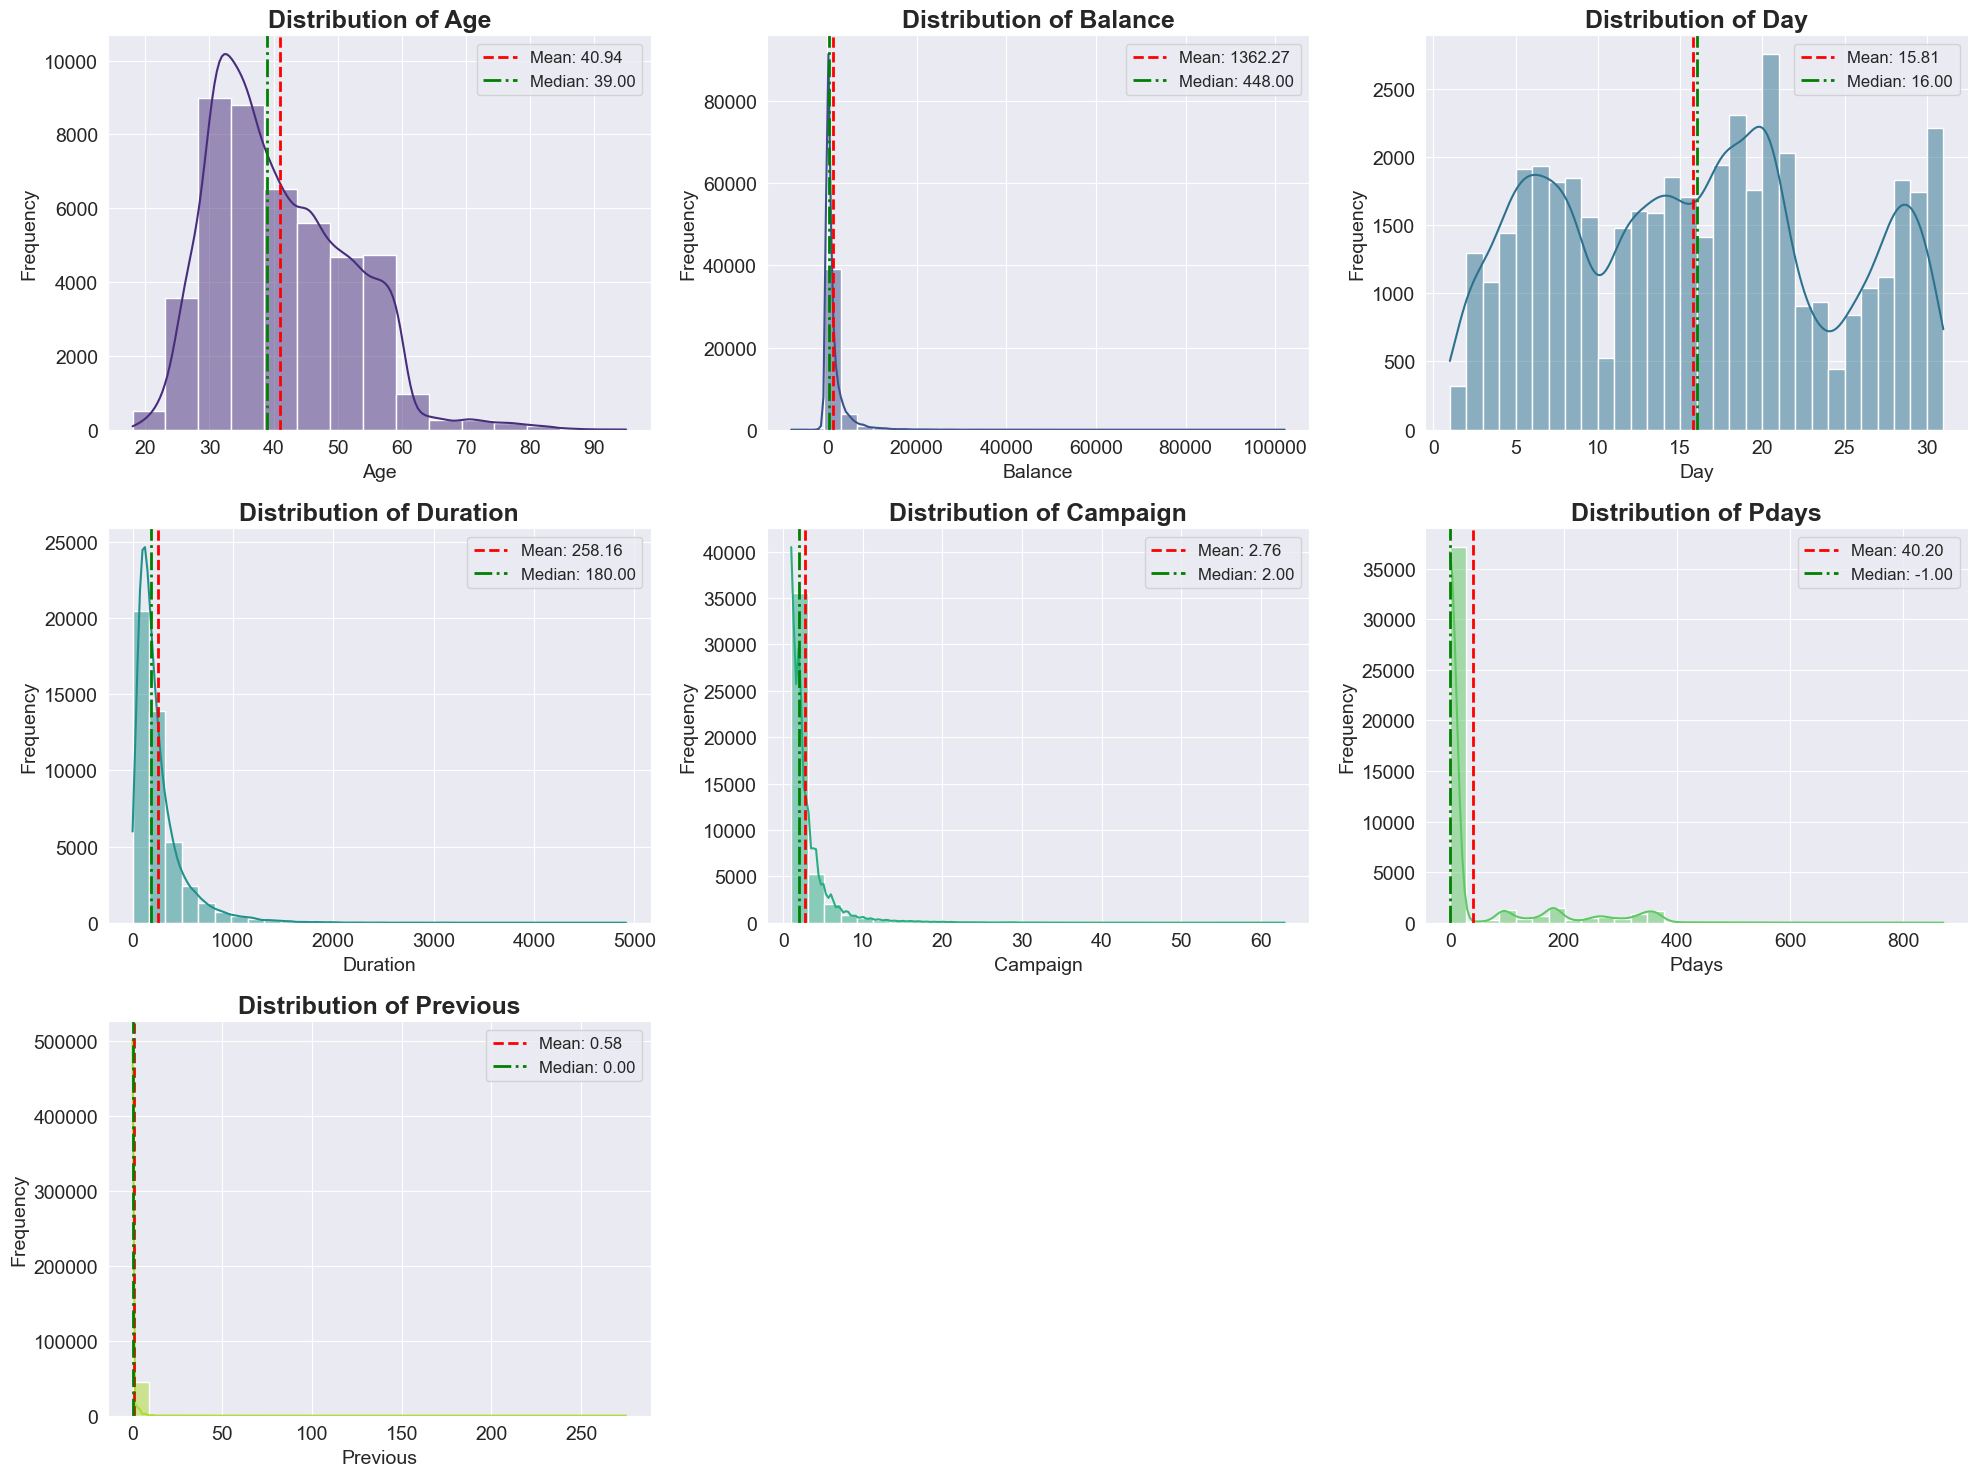

In [8]:
# Optional: Create a summary figure with all plots (still uniform)
plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    
    # For 'age', make the plot half as dense
    if col == 'age':
        bins = 15  # Half the number of bins for age
    else:
        bins = 30
        
    sns.histplot(data=df, x=col, kde=True, color=colors[i-1], bins=bins)
    plt.title(f'Distribution of {col.capitalize()}', fontsize=18, fontweight='bold')
    plt.xlabel(col.capitalize(), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2f}')
    plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig('all_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

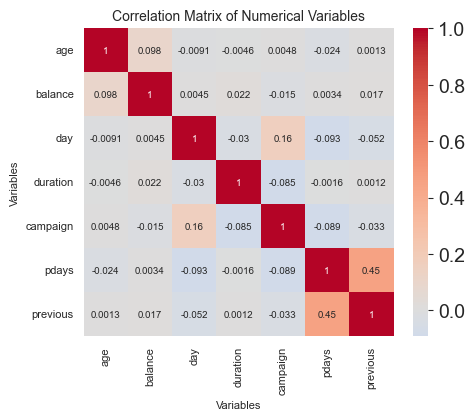

In [9]:
numerical_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
correlation_matrix = df[numerical_vars].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={'size': 7})  # Adjust font size here

# Reduce font size for the title and axis labels
plt.title('Correlation Matrix of Numerical Variables', fontsize=10)  # Adjust the title font size
plt.xlabel('Variables', fontsize=8)  # Adjust x-axis label font size
plt.ylabel('Variables', fontsize=8)  # Adjust y-axis label font size
plt.xticks(fontsize=8)  # Adjust x-axis tick label font size
plt.yticks(fontsize=8)  # Adjust y-axis tick label font size

plt.show()

/Users/anthonytk/Desktop/uci/1-2025-Winter/273p ML/final-project/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


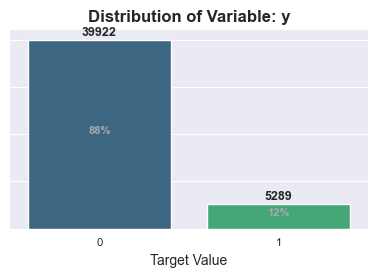


Class Distribution:
   Class  count  Percentage (%)
0      0  39922            88.0
1      1   5289            12.0


In [10]:
dh.plot(df, 'y', 'count')

/Users/anthonytk/Desktop/uci/1-2025-Winter/273p ML/final-project/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


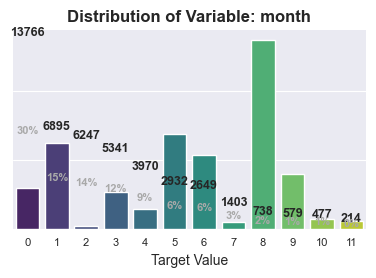

/Users/anthonytk/Desktop/uci/1-2025-Winter/273p ML/final-project/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')



Class Distribution:
    Class  count  Percentage (%)
0       8  13766            30.0
1       5   6895            15.0
2       1   6247            14.0
3       6   5341            12.0
4       9   3970             9.0
5       0   2932             6.0
6       3   2649             6.0
7       4   1403             3.0
8      10    738             2.0
9      11    579             1.0
10      7    477             1.0
11      2    214             0.0


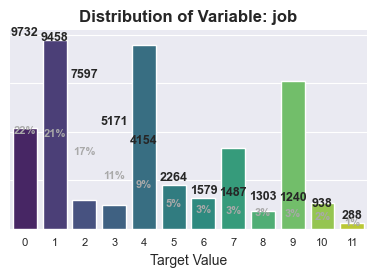


Class Distribution:
    Class  count  Percentage (%)
0       1   9732            22.0
1       4   9458            21.0
2       9   7597            17.0
3       0   5171            11.0
4       7   4154             9.0
5       5   2264             5.0
6       6   1579             3.0
7       2   1487             3.0
8      10   1303             3.0
9       3   1240             3.0
10      8    938             2.0
11     11    288             1.0


/Users/anthonytk/Desktop/uci/1-2025-Winter/273p ML/final-project/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


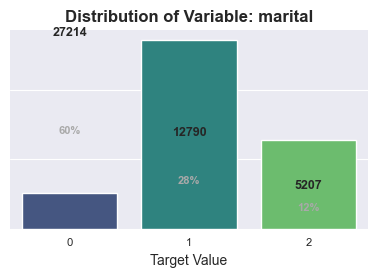


Class Distribution:
   Class  count  Percentage (%)
0      1  27214            60.0
1      2  12790            28.0
2      0   5207            12.0


/Users/anthonytk/Desktop/uci/1-2025-Winter/273p ML/final-project/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


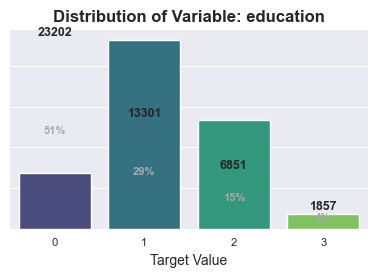


Class Distribution:
   Class  count  Percentage (%)
0      1  23202            51.0
1      2  13301            29.0
2      0   6851            15.0
3      3   1857             4.0


/Users/anthonytk/Desktop/uci/1-2025-Winter/273p ML/final-project/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


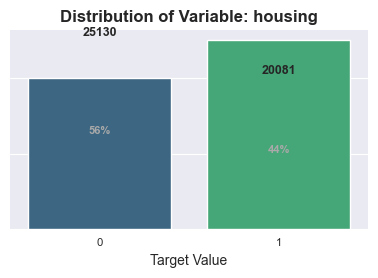


Class Distribution:
   Class  count  Percentage (%)
0      1  25130            56.0
1      0  20081            44.0


/Users/anthonytk/Desktop/uci/1-2025-Winter/273p ML/final-project/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


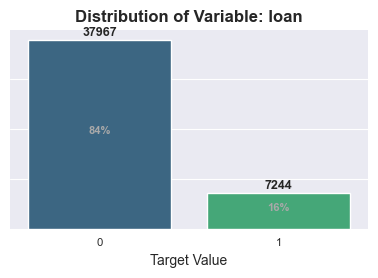


Class Distribution:
   Class  count  Percentage (%)
0      0  37967            84.0
1      1   7244            16.0


/Users/anthonytk/Desktop/uci/1-2025-Winter/273p ML/final-project/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


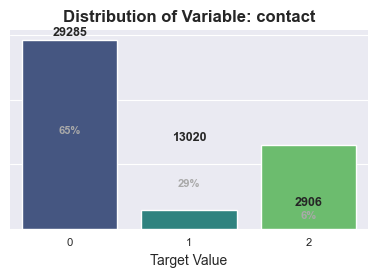


Class Distribution:
   Class  count  Percentage (%)
0      0  29285            65.0
1      2  13020            29.0
2      1   2906             6.0


/Users/anthonytk/Desktop/uci/1-2025-Winter/273p ML/final-project/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


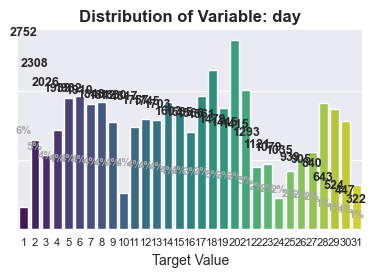


Class Distribution:
    Class  count  Percentage (%)
0      20   2752             6.0
1      18   2308             5.0
2      21   2026             4.0
3      17   1939             4.0
4       6   1932             4.0
5       5   1910             4.0
6      14   1848             4.0
7       8   1842             4.0
8      28   1830             4.0
9       7   1817             4.0
10     19   1757             4.0
11     29   1745             4.0
12     15   1703             4.0
13     12   1603             4.0
14     13   1585             4.0
15     30   1566             3.0
16      9   1561             3.0
17     11   1479             3.0
18      4   1445             3.0
19     16   1415             3.0
20      2   1293             3.0
21     27   1121             2.0
22      3   1079             2.0
23     26   1035             2.0
24     23    939             2.0
25     22    905             2.0
26     25    840             2.0
27     31    643             1.0
28     10    524      

/Users/anthonytk/Desktop/uci/1-2025-Winter/273p ML/final-project/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


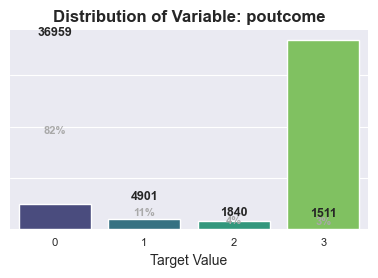


Class Distribution:
   Class  count  Percentage (%)
0      3  36959            82.0
1      0   4901            11.0
2      1   1840             4.0
3      2   1511             3.0


/Users/anthonytk/Desktop/uci/1-2025-Winter/273p ML/final-project/ml-classification-fin/data_vis_helper.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_counts, x=var, y=colname, palette='viridis')


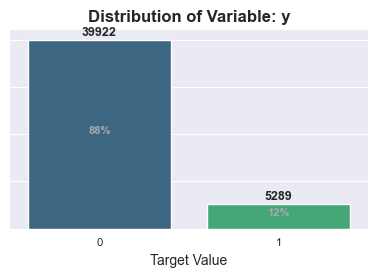


Class Distribution:
   Class  count  Percentage (%)
0      0  39922            88.0
1      1   5289            12.0


In [11]:
cats = ['month', 'job', 'marital', 'education', 'housing','loan', 'contact', 'day', 'poutcome', 'y']

for cat in cats: 
    dh.plot(df, cat, 'count')

# dh.plot(df, )